In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("ex1data1.txt", sep=",", names=["population", "profit"])
m = len(data)

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
m

97

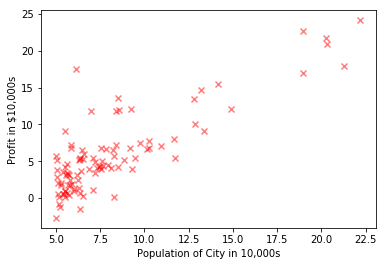

In [5]:
plt.scatter(data["population"], data["profit"], c="red", marker="x", alpha=0.5)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [6]:
# Create matrix of our x-values
x = data.iloc[:,0]
# np.ones is our x0 and np.matrix(x.values) is our x1
matX = np.vstack([np.ones(m), np.matrix(x.values)])

# Create our matrix of y-values
y = data.iloc[:,1]
matY = np.matrix(y.values)

init_theta = np.matrix(np.zeros(2))
iterations = 1500
alpha = 0.01

In [7]:
# Define the hypothesis function h
def hyp(theta, x):
    return np.matmul(theta, x)

# Define cost function J
def computeCost(X, y, theta):
    newMat = np.square(hyp(theta, X) - y)
    finalVal = (1/(2*float(m)))*np.sum(newMat)
    return finalVal

In [8]:
computeCost(matX, matY, [-1,2])

54.242455082012377

In [9]:
# summation for derivative of the cost function to be used in our gradient descent formula
def summation(X, Y, theta, j):
    newMat = np.multiply((hyp(theta, X) - Y), X[j])
    return np.sum(newMat)


def gradDescent(X, Y, start_theta, alpha, iters):
    theta = np.asarray(start_theta)
    theta_history = np.asarray(init_theta)
    j_history = [computeCost(matX,matY,init_theta)]
    for i in range(iters):
        # θj when j=0
        temp0 = theta[0,0]
        temp0 = theta[0,0] - (alpha/m)*summation(X, Y, theta, 0)
        # θj when j=1
        temp1 = theta[0,1]
        temp1 = theta[0,1] - (alpha/m)*summation(X, Y, theta, 1)
        
        theta = np.array([(temp0, temp1)])
        theta_history = np.vstack((theta_history, theta))
        newJ = computeCost(matX,matY,theta)
        j_history.append(newJ)
    return theta_history, j_history


In [10]:
thet, j = gradDescent(matX, matY, init_theta, alpha, iterations)
thet[iterations], j[iterations]

(array([-3.63029144,  1.16636235]), 4.483388256587725)

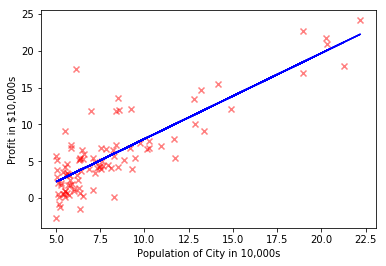

In [11]:
def fitLine(x):
    return (thet[iterations][0] + thet[iterations][1]*x)

plt.scatter(data["population"], data["profit"], c="red", marker="x", alpha=0.5)
plt.plot(data["population"], fitLine(data["population"].values),c="blue")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

Text(0,0.5,u'Cost')

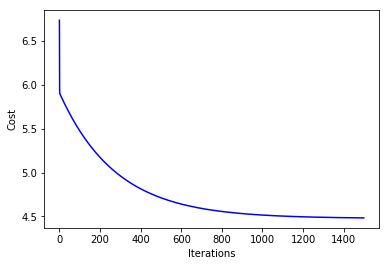

In [16]:
# visualizing our cost minimization
newArr = np.delete(j, 0)
plt.plot(np.arange(iterations), newArr, '-b')
plt.xlabel('Iterations')  
plt.ylabel('Cost')  